In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dataset Overview:

The dataset comprises ten key columns that shed light on Realme mobiles' essential attributes:

name: Names of various Realme smartphone models.

ratings: User ratings and reviews associated with each model, reflecting customer satisfaction.

price: Prices of the Realme mobiles, helping users understand the affordability and value proposition.

imgURL: Image URLs corresponding to each model, facilitating visual exploration.
storage_ram: Details about the storage capacity and RAM configuration for each device.

camera: Information about the camera specifications, essential for photography enthusiasts.

oS_Processor: Operating system and processor details, crucial for performance analysis.

display: Display-related specifications, such as size and resolution, offering insights into visual experience.

network: Network technologies supported by each Realme mobile, ensuring compatibility for different regions.

battery: Battery-related specifications, including capacity and endurance, important factors for heavy users.

In [3]:
data = pd.read_csv("/content/realme_uncleaned_MobilesData.csv")
data.head(3)

,name,ratings,price,imgURL,storage_ram,camera,oS_Processor,display,network,battery
0,"realme C33 2023 (Sandy Gold, 128 GB)",4.4,"₹10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeUnisoc...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.51 cm (6.5 inch)Resolution1600 ...,"Network Type4G VOLTE, 4G, 3G, 2GSupported Netw...",Battery Capacity5000 mAh
1,"realme C33 2023 (Aqua Blue, 128 GB)",4.4,"₹10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeUnisoc...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.51 cm (6.5 inch)Resolution1600 ...,"Network Type4G VOLTE, 4G, 3G, 2GSupported Netw...",Battery Capacity5000 mAh
2,"realme C33 2023 (Night Sea, 128 GB)",4.4,"₹10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeUnisoc...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.51 cm (6.5 inch)Resolution1600 ...,"Network Type4G VOLTE, 4G, 3G, 2GSupported Netw...",Battery Capacity5000 mAh


In [4]:
data.duplicated().sum()

15

In [5]:
data.isna().sum()

name             0
ratings         35
price            0
imgURL           0
storage_ram      0
camera           0
oS_Processor     0
display          0
network          0
battery          0
dtype: int64

In [6]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
df2 = data.drop(["name","imgURL","oS_Processor","display","network","camera"],axis=1)
df2.head()

,ratings,price,storage_ram,battery
0,4.4,"₹10,499",Internal Storage128 GBRAM4 GBExpandable Storag...,Battery Capacity5000 mAh
1,4.4,"₹10,499",Internal Storage128 GBRAM4 GBExpandable Storag...,Battery Capacity5000 mAh
2,4.4,"₹10,499",Internal Storage128 GBRAM4 GBExpandable Storag...,Battery Capacity5000 mAh
3,4.2,"₹5,999",Internal Storage32 GBRAM2 GBExpandable Storage...,Battery Capacity5000 mAh
4,4.1,"₹6,499",Internal Storage32 GBRAM3 GBExpandable Storage...,Battery Capacity5000 mAh


In [9]:
df2["price"]

0      ₹10,499
1      ₹10,499
2      ₹10,499
3       ₹5,999
4       ₹6,499
        ...   
257    ₹38,999
258    ₹34,999
259     ₹7,499
260     ₹9,999
261     ₹8,999
Name: price, Length: 214, dtype: object

In [10]:
df2['price'] = df2['price'].str.replace('₹' , '').astype(str)
df2['price'] = df2['price'].str.replace(',' , '').astype(int)

In [11]:
df2['price']

0      10499
1      10499
2      10499
3       5999
4       6499
       ...  
257    38999
258    34999
259     7499
260     9999
261     8999
Name: price, Length: 214, dtype: int64

In [12]:
def extract_storage(row):
    storage = row.split()[1]
    return storage

def extract_ram(row):
    ram = row.split()[2]
    return ram

df2['storage'] = df2['storage_ram'].apply(func=extract_storage)
df2['ram'] = df2['storage_ram'].apply(func=extract_ram)

In [13]:
df2.head(2)

,ratings,price,storage_ram,battery,storage,ram
0,4.4,10499,Internal Storage128 GBRAM4 GBExpandable Storag...,Battery Capacity5000 mAh,Storage128,GBRAM4
1,4.4,10499,Internal Storage128 GBRAM4 GBExpandable Storag...,Battery Capacity5000 mAh,Storage128,GBRAM4


In [14]:
df2.drop(['storage_ram'] , axis=1)

,ratings,price,battery,storage,ram
0,4.4,10499,Battery Capacity5000 mAh,Storage128,GBRAM4
1,4.4,10499,Battery Capacity5000 mAh,Storage128,GBRAM4
2,4.4,10499,Battery Capacity5000 mAh,Storage128,GBRAM4
3,4.2,5999,Battery Capacity5000 mAh,Storage32,GBRAM2
4,4.1,6499,Battery Capacity5000 mAh,Storage32,GBRAM3
...,...,...,...,...,...
257,4.3,38999,Battery Capacity5000 mAh,Storage256,GBRAM12
258,4.6,34999,Battery Capacity5000 mAh,Storage128,GBRAM8
259,4.4,7499,Battery Capacity5000 mAh,Storage32,GBRAM3
260,4.4,9999,Battery Capacity5000 mAh,Storage64,GBRAM4


In [ ]:
df2['storage'] = df2['storage'].str.replace('Storage', '').astype(str)
df2['storage'] = df2['storage'].str.replace('Storage', '').astype(int)
df2['ram'] = df2['ram'].str.replace('GBRAM', '').astype(str)
df2['ram'] = df2['ram'].str.replace('GBRAM', '').astype(int)

In [19]:
df2.head(2)

,ratings,price,storage_ram,battery,storage,ram
0,4.4,10499,Internal Storage128 GBRAM4 GBExpandable Storag...,Battery Capacity5000 mAh,128,4
1,4.4,10499,Internal Storage128 GBRAM4 GBExpandable Storag...,Battery Capacity5000 mAh,128,4


In [20]:
df2['battery'] = df2['battery'].str.extract('(\d+)').astype(int)

In [21]:
df2.head(2)

,ratings,price,storage_ram,battery,storage,ram
0,4.4,10499,Internal Storage128 GBRAM4 GBExpandable Storag...,5000,128,4
1,4.4,10499,Internal Storage128 GBRAM4 GBExpandable Storag...,5000,128,4


In [22]:
df2.drop(["storage_ram"] , axis=1)

,ratings,price,battery,storage,ram
0,4.4,10499,5000,128,4
1,4.4,10499,5000,128,4
2,4.4,10499,5000,128,4
3,4.2,5999,5000,32,2
4,4.1,6499,5000,32,3
...,...,...,...,...,...
257,4.3,38999,5000,256,12
258,4.6,34999,5000,128,8
259,4.4,7499,5000,32,3
260,4.4,9999,5000,64,4


In [25]:
df2.isna().sum()

ratings        0
price          0
storage_ram    0
battery        0
storage        0
ram            0
dtype: int64

In [26]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [29]:
X = df2[['ratings' , 'battery' , 'storage' , 'ram']]
y = df2['price']

In [31]:
X.sample(4)

,ratings,battery,storage,ram
102,4.4,4300,64,6
30,4.5,5000,64,4
41,4.3,5000,128,6
73,4.4,6000,64,4


In [32]:
y.sample(4)

100    31999
125    42999
253    10499
28      8049
Name: price, dtype: int64

In [33]:
reg.fit(X,y)

LinearRegression()

In [35]:
from sklearn.metrics import r2_score
predictions = reg.predict(X)
r2 = r2_score(y, predictions)
print("R-squared:", r2)

R-squared: 0.740102556641095


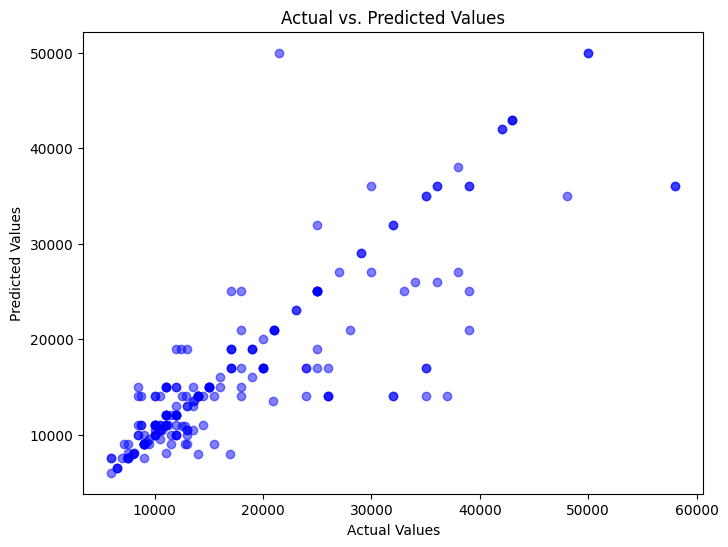

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, color='blue', alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

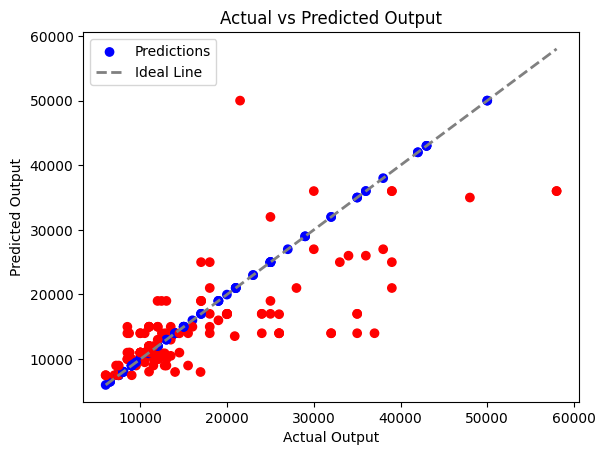

In [45]:
plt.scatter(y, predictions, c=['blue' if p == y_ else 'red' for p, y_ in zip(predictions, y)], label='Predictions')
plt.plot([min(y), max(y)], [min(y), max(y)], color='gray', linestyle='--', linewidth=2, label='Ideal Line')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual vs Predicted Output')
plt.legend()
plt.show()

In [37]:
reg.predict([[4.4,5000,128,4]]).astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13382])

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.2558139534883721


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model
logreg = LogisticRegression()

# Fit the model to your data
logreg.fit(X, y)

# Make predictions
predictions = logreg.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, predictions)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.0794392523364486


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Create an XGBoost Regressor model
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model to your data
xgb_regressor.fit(X, y)

# Make predictions
predictions = xgb_regressor.predict(X)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, predictions))

# Print the RMSE
print("RMSE:", rmse)


RMSE: 3698.211975569226


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN Classifier model
k = 3  # You can adjust the value of k
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model to the entire dataset
knn.fit(X, y)

# Make predictions on the same dataset
predictions = knn.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, predictions)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.4252336448598131
